In [100]:
___Author___='LumberJack Jyss'

In [101]:
print('Global Optimized LumberJack Equities Method\n°OoO_FOREX_Oo0°\nLumberJack Jyss 5779(c)')

Global Optimized LumberJack Equities Method
°OoO_FOREX_Oo0°
LumberJack Jyss 5779(c)


In [102]:
print('Importing librairies...')
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score,roc_curve,confusion_matrix,classification_report
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Dropout
from keras.utils import to_categorical
%matplotlib inline
print('Librairies imported')

Importing librairies...
Librairies imported


In [103]:
import warnings
import tensorflow as tf
warnings.filterwarnings("ignore")
tf.logging.set_verbosity(tf.logging.ERROR)

In [104]:
df_1D = pd.read_csv('20190526 data prepared.csv')
df_1D = df_1D.iloc[:,1:]
df_1D = df_1D.dropna()
df_1D.reset_index(inplace=True,drop=True)

In [105]:
df_1D.isnull().sum().sum()

0

In [106]:
df_1D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6440 entries, 0 to 6439
Data columns (total 23 columns):
Date                  6440 non-null object
Varop_Spy             6440 non-null float64
Varhl_spy             6440 non-null float64
RSI                   6440 non-null float64
75 - RSI              6440 non-null float64
RSI - 25              6440 non-null float64
BBD_Delta_Up          6440 non-null float64
delta5_8              6440 non-null float64
delta8_10             6440 non-null float64
delta10_12            6440 non-null float64
delta12_15            6440 non-null float64
delta15_30            6440 non-null float64
delta30_35            6440 non-null float64
delta35_40            6440 non-null float64
delta40_45            6440 non-null float64
delta45_50            6440 non-null float64
Peaks                 6440 non-null int64
Valley                6440 non-null int64
delta_tsf             6440 non-null float64
Forcast Oscillator    6440 non-null float64
target_up         

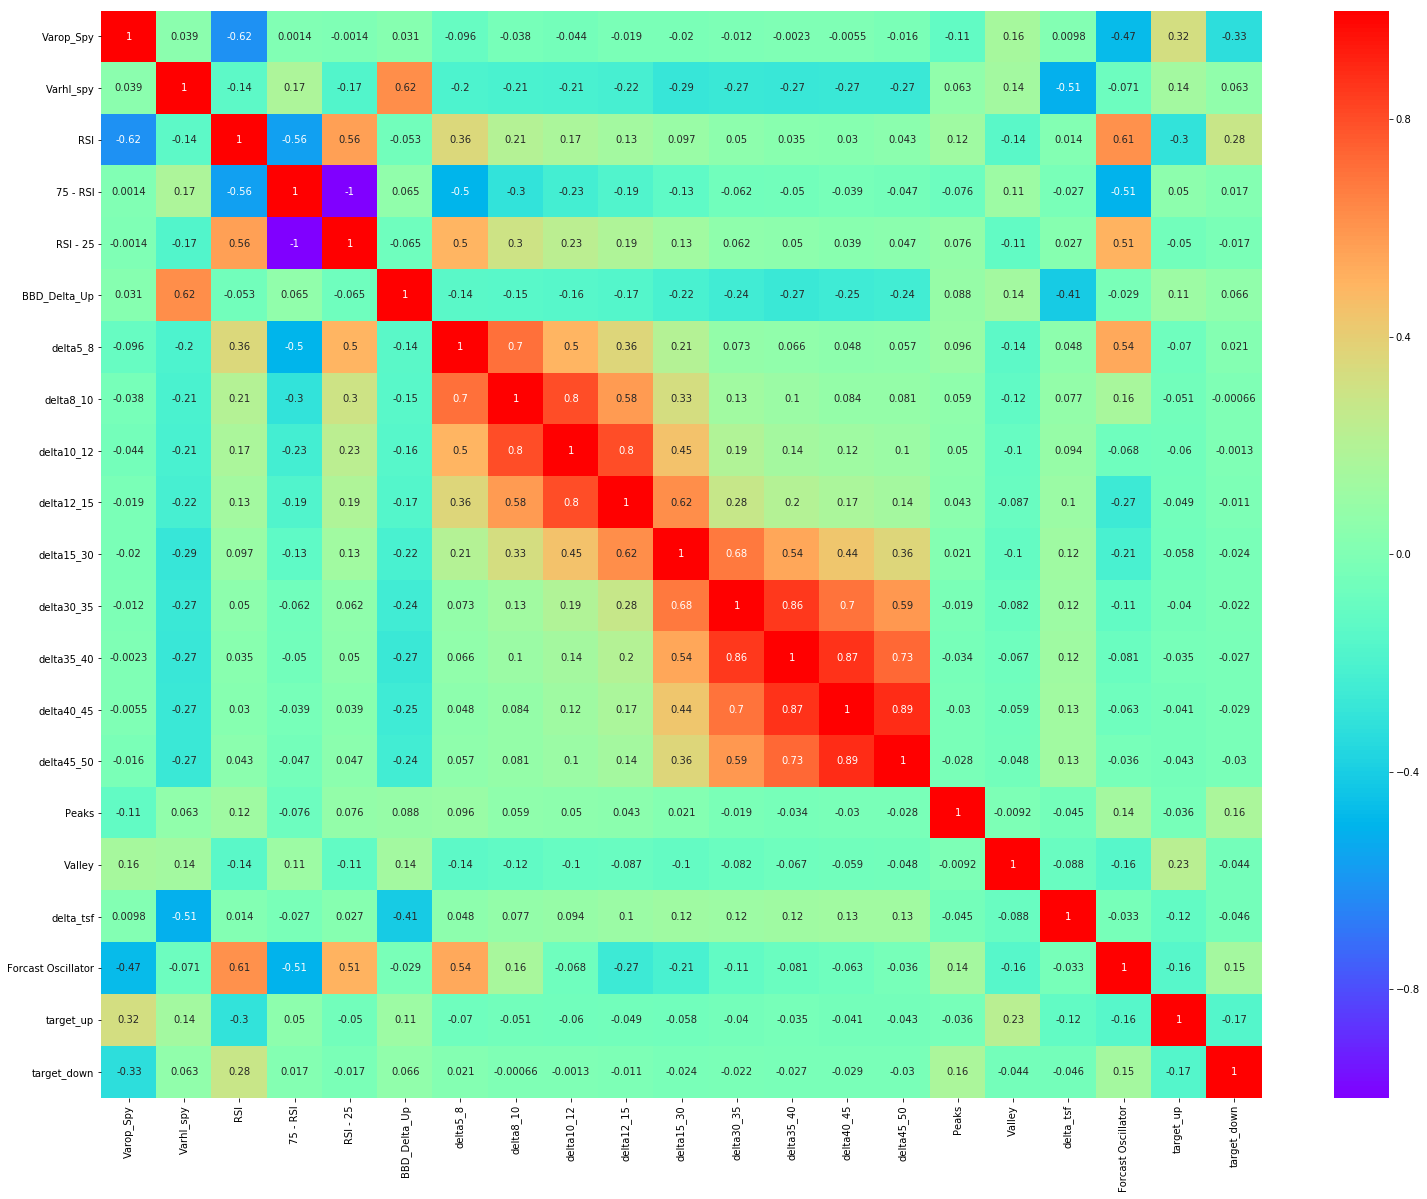

In [107]:
plt.figure(figsize=(26,20))
sns.heatmap(df_1D.iloc[:,:-1].corr(),annot=True,cmap='rainbow')
plt.show()

In [108]:
df_1D.shape

(6440, 23)

In [109]:
df_1D['target_up'].sum(),df_1D['target_down'].sum()

(798, 1101)

In [110]:
delta = round(df_1D.shape[0])
bloc1 = round(delta*0.8)
bloc2 = delta - bloc1
print("# of periods : ",delta)
print('On 80% - 20% slash : ')
print('Bloc 1 : ',bloc1,' periods (',df_1D.iloc[bloc1,0],')\nBloc 2 :',bloc2,' periods (',df_1D.iloc[bloc2,0],')')
print('First period :',df_1D.iloc[0,0])
print('Last period :',df_1D.iloc[df_1D.shape[0]-1,0])


# of periods :  6440
On 80% - 20% slash : 
Bloc 1 :  5152  periods ( 20190321  17:30:00 )
Bloc 2 : 1288  periods ( 20180814  21:30:00 )
First period : 20180604  21:30:00
Last period : 20190531  21:45:00


In [111]:
X = df_1D.iloc[:,1:-1]
y = df_1D.iloc[:,-1].shift(-1).values

In [112]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
y = np.array(y).reshape(-1,1)

In [113]:
Xtrain = X[:bloc1,:]
Xtest = X[bloc1:,:]
ytrain = y[:bloc1,:]
ytest = y[bloc1:,:]

In [114]:
Xtrain = Xtrain.reshape((Xtrain.shape[0],1,Xtrain.shape[1]))
Xtest = Xtest.reshape((Xtest.shape[0],1,Xtest.shape[1]))

ytrain = ytrain.reshape((ytrain.shape[0],1,ytrain.shape[1]))
ytest = ytest.reshape((ytest.shape[0],1,ytest.shape[1]))


Xtrain.shape,Xtest.shape, ytrain.shape , ytest.shape

((5152, 1, 21), (1288, 1, 21), (5152, 1, 1), (1288, 1, 1))

In [115]:
n_timesteps = Xtrain.shape[0]
print('Processing prediction')
model = Sequential()
model.add(TimeDistributed(Dense(1, activation='relu')))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(activation='relu',units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(activation='relu',units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(activation='relu',units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(activation='relu',units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(activation='relu',units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(activation='relu',units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(activation='relu',units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(Dense(1, activation='relu'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['acc'])
model.fit(Xtrain, ytrain, epochs=400, batch_size=32, verbose=0)
print('Done')

Processing prediction
Done


In [116]:
train_acc = model.evaluate(Xtrain, ytrain,verbose=1)
train_acc

5152/5152 [==============================] - 2s 320us/step


[214.06571019806478, 0.00038819875776397513]

In [117]:
yhat = model.predict(Xtest)

In [118]:
score = model.evaluate(Xtest, ytest,verbose=1)
score

1288/1288 [==============================] - 0s 102us/step


[nan, 0.0]

In [119]:
ytrue = df_1D.iloc[-1288:,-1]
ytrue.reset_index(inplace=True,drop=True)
ytrue.shape,len(yhat),df_1D.iloc[-1288:,-1].shape

((1288,), 1288, (1288,))

In [120]:
resultats = pd.DataFrame()
resultats['Date'] = df_1D.iloc[-1288:,0]
resultats.reset_index(inplace=True,drop=True)
resultats['Actual'] = ytrue

In [121]:
resultats['Predicted'] = yhat.reshape(1288,)

In [122]:
resultats.head()

,Date,Actual,Predicted
0,20190321 17:30:00,2844.04,2829.263428
1,20190321 17:45:00,2844.02,2848.288330
2,20190321 18:00:00,2847.95,2845.806641
3,20190321 18:15:00,2849.24,2852.268066
4,20190321 18:30:00,2847.94,2845.299805


In [123]:
ytest = ytest.reshape(ytest.shape[0],ytest.shape[1])

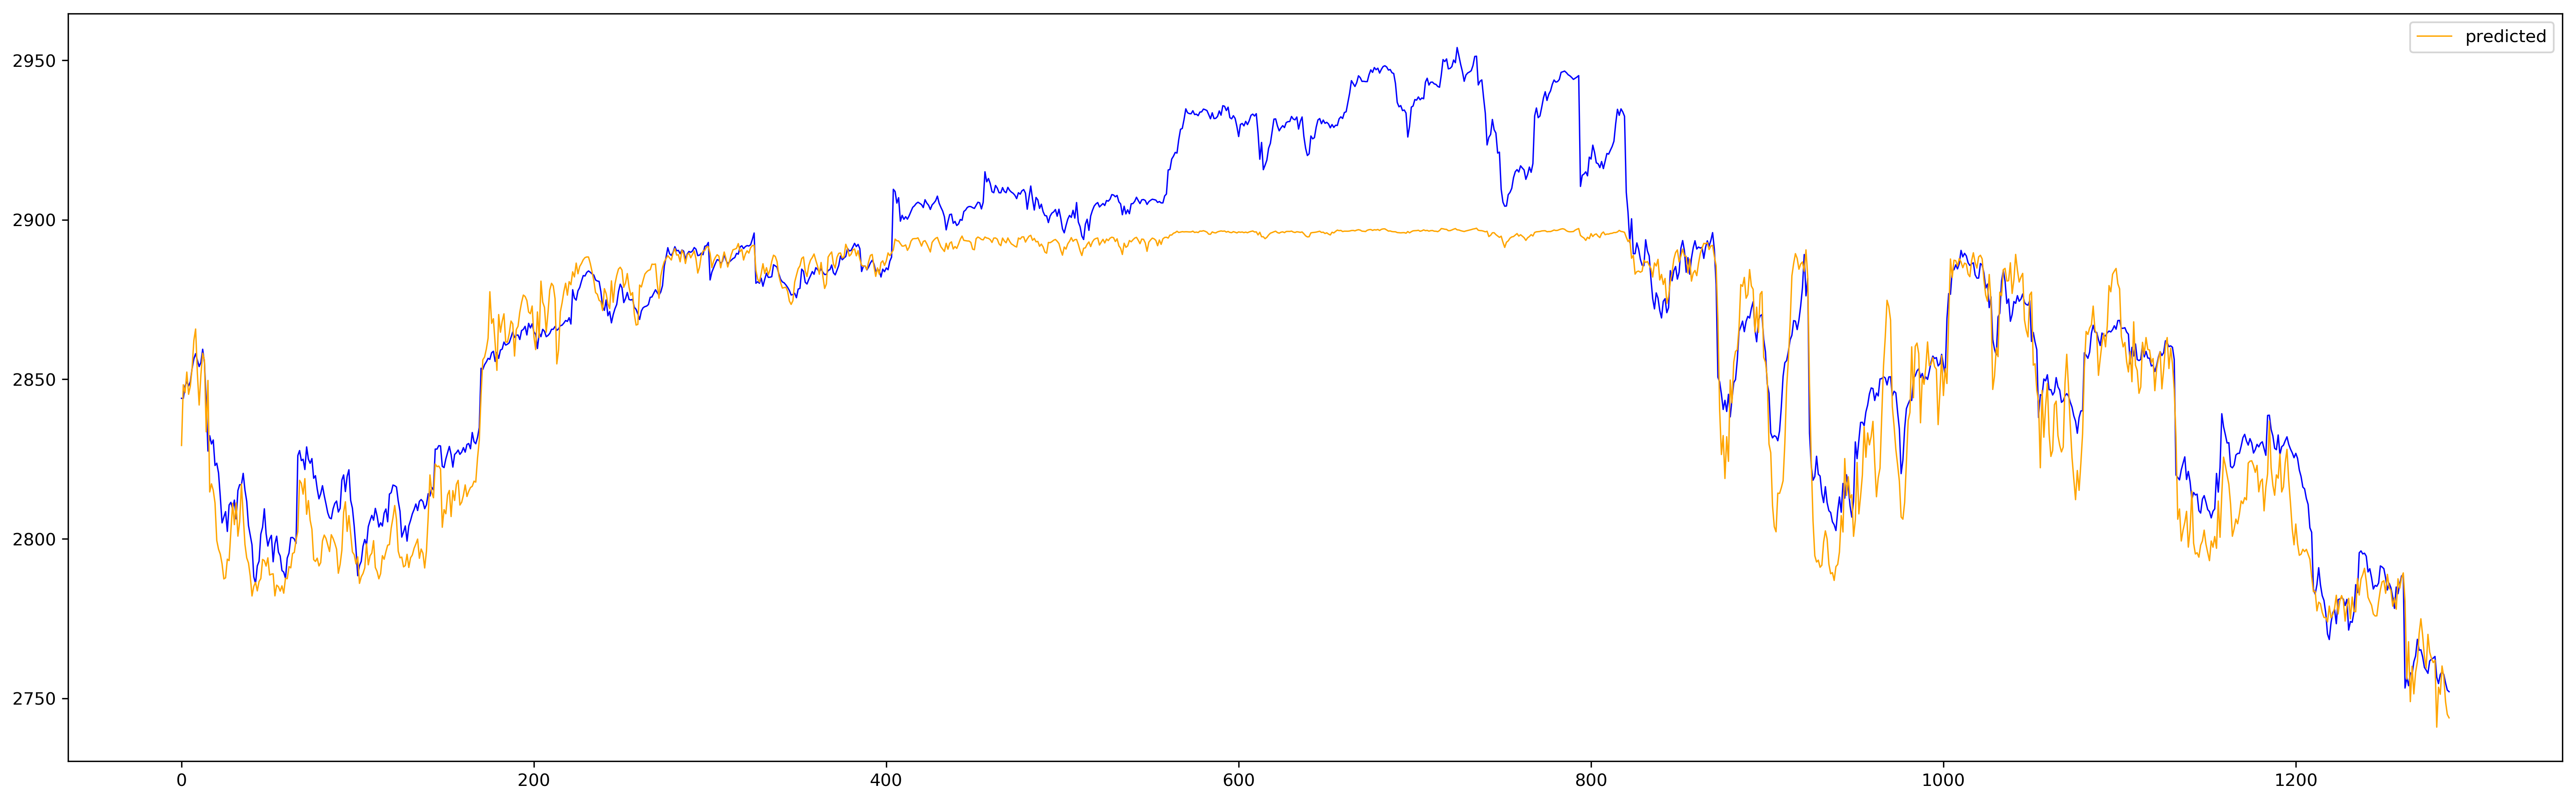

In [124]:
plt.figure(figsize=(26,8),dpi=300)
plt.plot(np.array(ytrue).reshape(1288,),color='blue',lw=0.8)
plt.plot(yhat.reshape(1288,),color='orange',label='predicted',lw=0.8)
#plt.xlim(5100,6500)
#plt.ylim(2700,3000)
plt.legend()